In [2]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from warnings import filterwarnings
filterwarnings('ignore')

1)INTRODUCTION

I examined data before suggest to business problem. Fill NaN values with correct values that the way I think it is right. This infos been in own cells. Data has accident by Traffic Records. I evaulate here how accident is happened, how many people dead or get injured, how many vehicle included accident, collisions type of vehicles, 
as so many parameters in that data. There are some factors about driver that get drunk or alcohol.Weather, road and light condition about accident. Location of accident. All that parameters will be examined in detail. If an accident occur anywhere , data has information about there. I said "there" is that mean all info about cars, peoples,weather condition namely all factors may affect the accident.

2)BUSINESS PROBLEM

where did the accident occur ? why did the accident happen ? which factors affect the accident weather, light or road condition or all of them ? was driver drunk? was driver too speedly?  I think ours target is that questions answer. I want to see factors that affect tha accident. Collisions type and collisions adress is interest each other. If interest , how we explain this ? which time interval is have high accident rate and why is that? then maybe find some solution about accident problem. Maybe it is road problem or psychological problem or we dont discover yet that any new problem that we will discover with this data.

3)DATA

Data include accident that have some factors about driver, pedesterian, road cond, weather cond, road type, collisions type, accident time, location, severity, injuries, dead. How occur accident and its explanation as briefly. I did some adjustment about unknown situtions. I will do some feature engineering and add some new attributes in that data. Maybe detect the location in that occur accident frequently. And below I explain data in detail and do some changing about missing values and thought to be wrong values.

<b>OBJECTID: </b> ObjectID <br></br>
<b>SRI: </b> unique identifier <br></br>
<b>SHAPE: </b> Geometry <br></br>
<b>ESRI: </b> geometry field <br></br>
<b>INCKEY: </b> Long, A unique key for the incident <br></br>
<b>COLDETKEY: </b> Long, Secondary key for the incident <br></br>
<b>ADDRTYPE: </b> Text, 12 Collision address type: <br></br>
• Alley <br></br>
• Block <br></br>
• Intersection <br></br>
<b>INTKEY </b> Double, Key that corresponds to the intersection associated with a collision <br></br>
<b>LOCATION: </b> Text, 255 Description of the general location of the collision <br> 
<b>EXCEPTRSNCODE: </b> Text, 10 <br>
<b>EXCEPTRSNDESC: </b> Text, 300 <br>
<b>SEVERITYCODE: </b> Text, 100 A code that corresponds to the severity of the collision: <br>
• 3—fatality <br>
• 2b—serious injury <br>
• 2—injury <br>
• 1—prop damage <br>
• 0—unknown <br>
<b>SEVERITYDESC: </b> Text A detailed description of the severity of the collision <br>
<b>COLLISIONTYPE: </b> Text, 300 Collision type <br>
<b>PERSONCOUNT: </b> Double, The total number of people involved in the collision <br>
<b>PEDCOUNT: </b> Double, The number of pedestrians involved in the collision. This is entered by the state. <br>
<b>PEDCYLCOUNT: </b> Double, The number of bicycles involved in the collision.This is entered by the state. <br>
<b>VEHCOUNT: </b> Double, The number of vehicles involved in the collision.This is entered by the state. <br>
<b>INJURIES: </b> Double, The number of total injuries in the collision. This is entered by the state. <br>
<b>SERIOUSINJURIES: </b> Double, The number of serious injuries in the collision.This is entered by the state. <br>
<b>FATALITIES: </b> Double, The number of fatalities in the collision. This is entered by the state. <br>
<b>INCDATE: </b> Date, The date of the incident. <br>
<b>INCDTTM: </b> Text, 30 The date and time of the incident. <br>
<b>JUNCTIONTYPE: </b> Text, 300 Category of junction at which collision took place <br>
<b>SDOT_COLCODE: </b> Text, 10 A code given to the collision by SDOT. <br>
<b>SDOT_COLDESC: </b> Text, 300 A description of the collision corresponding to the collision code. <br>
<b>INATTENTIONIND: </b> Text, 1 Whether or not collision was due to inattention.(Y/N) <br>
<b>UNDERINFL: </b> Text, 10 Whether or not a driver involved was under the influence of drugs or alcohol. <br>
<b>WEATHER: </b> Text, 300 A description of the weather conditions during the time of the collision. <br>
<b>ROADCOND: </b> Text, 300 The condition of the road during the collision. <br>
<b>LIGHTCOND: </b> Text, 300 The light conditions during the collision. <br>
<b>PEDROWNOTGRNT: </b> Text, 1 Whether or not the pedestrian right of way was not granted. (Y/N) <br>
<b>SDOTCOLNUM: </b> Text, 10 A number given to the collision by SDOT. <br>
<b>SPEEDING: </b> Text, 1 Whether or not speeding was a factor in the collision. (Y/N) <br>
<b>ST_COLCODE: </b> Text, 10 A code provided by the state that describes the collision. For more information about these codes, please see the State Collision Code Dictionary. <br>
<b>ST_COLDESC: </b> Text, 300 A description that corresponds to the state’s coding designation. <br>
<b>SEGLANEKEY: </b> Long, A key for the lane segment in which the collision occurred. <br>
<b>CROSSWALKKEY: </b> Long, A key for the crosswalk at which the collision occurred. <br>
<b>HITPARKEDCAR: </b> Text, 1 Whether or not the collision involved hitting a parked car. (Y/N) <br>

In [3]:
data = pd.read_csv("Data-Collisions.csv")

In [4]:
data.head().T

,0,1,2,3,4
SEVERITYCODE,2,1,1,1,2
X,-122.323,-122.347,-122.335,-122.335,-122.306
Y,47.7031,47.6472,47.6079,47.6048,47.5457
OBJECTID,1,2,3,4,5
INCKEY,1307,52200,26700,1144,17700
COLDETKEY,1307,52200,26700,1144,17700
REPORTNO,3502005,2607959,1482393,3503937,1807429
STATUS,Matched,Matched,Matched,Matched,Matched
ADDRTYPE,Intersection,Block,Block,Block,Intersection
INTKEY,37475,NaN,NaN,NaN,34387


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

In [6]:
# I dropped some columns that don't need.
# severitycode column duplicated.so I dropped it.

dropped_columns = ["SEVERITYCODE", "INCKEY", "COLDETKEY", "REPORTNO", "INCDATE"]
df = data.drop(dropped_columns, axis=1)

In [7]:
# I filled missing values with correct values.To do I evaulate some metric then fill that missing values
# with correct values. I stated that info in about its cells.

In [8]:
data.HITPARKEDCAR.value_counts()

N    187457
Y      7216
Name: HITPARKEDCAR, dtype: int64

In [9]:
df["HITPARKEDCAR"] = df["HITPARKEDCAR"].apply(lambda x: 0 if x=="N" else 1)

In [10]:
df.HITPARKEDCAR.value_counts()

0    187457
1      7216
Name: HITPARKEDCAR, dtype: int64

In [11]:
df.head().T

,0,1,2,3,4
X,-122.323,-122.347,-122.335,-122.335,-122.306
Y,47.7031,47.6472,47.6079,47.6048,47.5457
OBJECTID,1,2,3,4,5
STATUS,Matched,Matched,Matched,Matched,Matched
ADDRTYPE,Intersection,Block,Block,Block,Intersection
INTKEY,37475,NaN,NaN,NaN,34387
LOCATION,5TH AVE NE AND NE 103RD ST,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,2ND AVE BETWEEN MARION ST AND MADISON ST,SWIFT AVE S AND SWIFT AV OFF RP
EXCEPTRSNCODE,,NaN,NaN,,NaN
EXCEPTRSNDESC,NaN,NaN,NaN,NaN,NaN
SEVERITYCODE.1,2,1,1,1,2


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 33 columns):
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDTTM           194673 non-null object
JUNCTIONTYPE      188344 non-null object
SDOT_COLCODE      194673 non-null int64
SDOT_COLDESC      194673 non-null object
INATTENTIONIND    29805 non-null object
UNDERINFL         189789 non-null obj

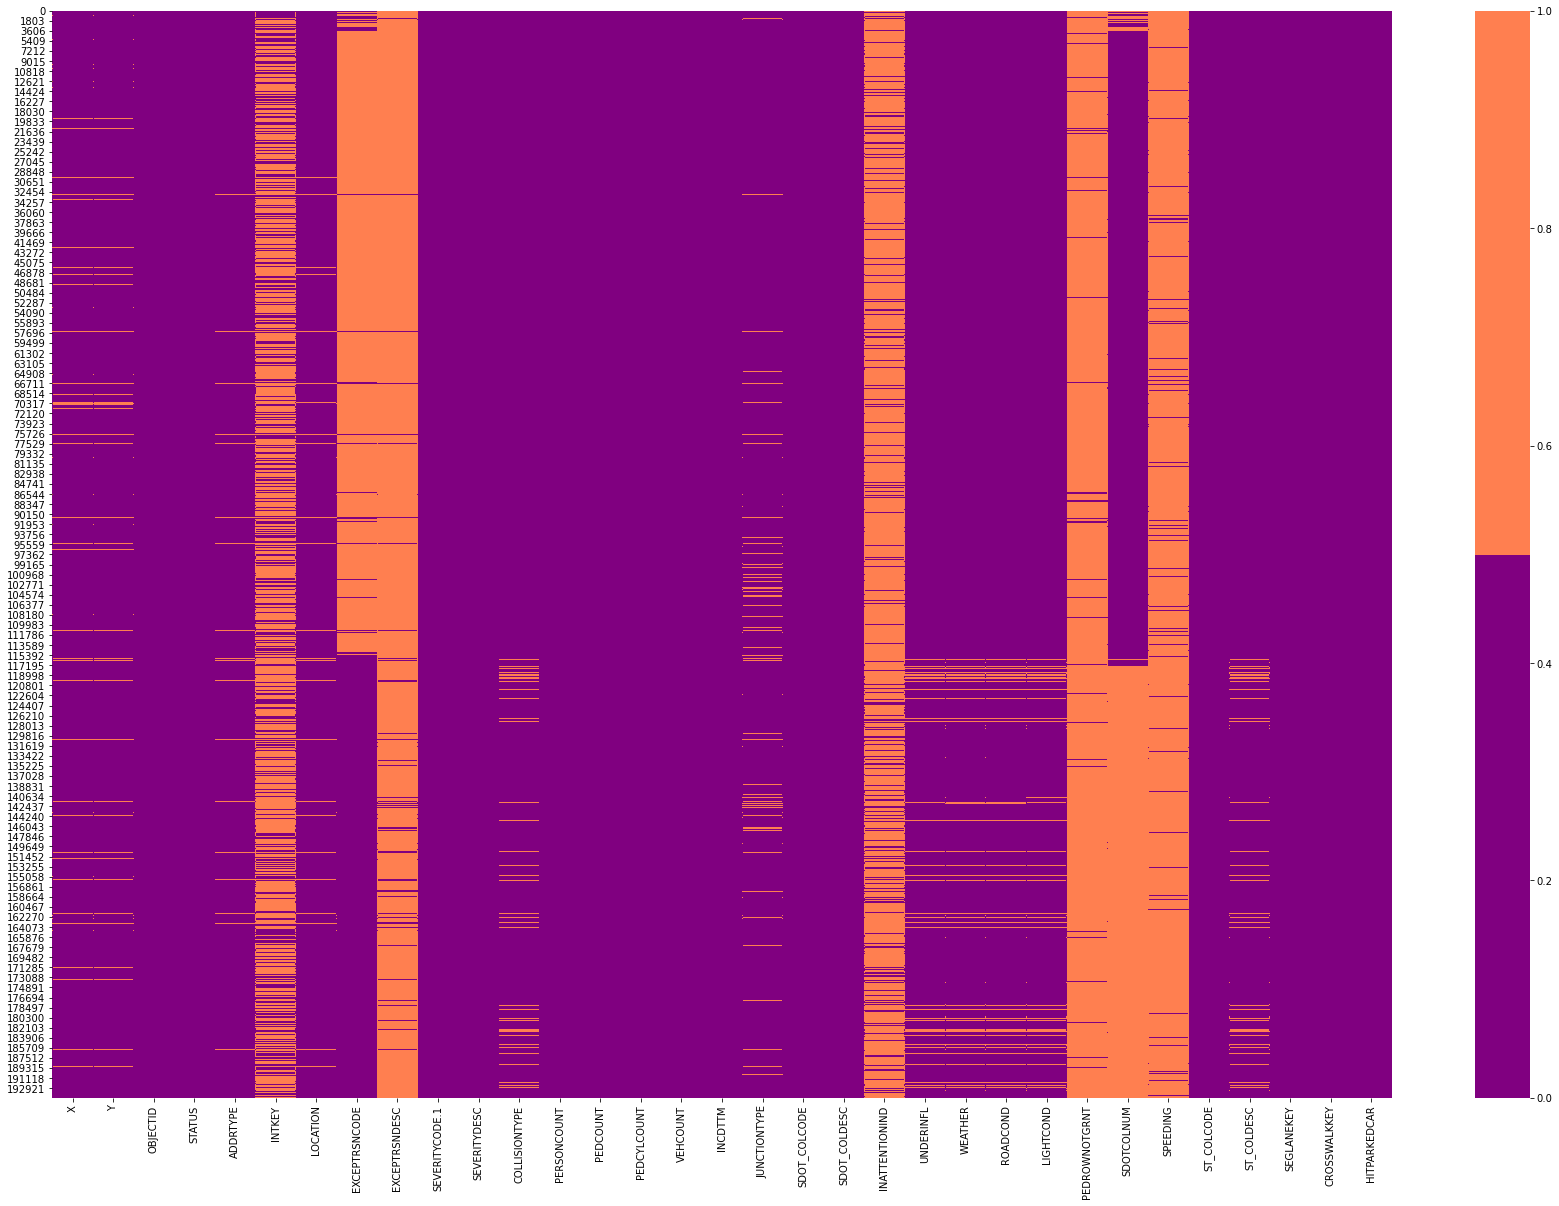

In [13]:
# I visualize here missing values.then I will fill missing values.

import seaborn as sns
cols = df.columns[:] 

colours = ['purple', 'coral'] # specify the colours - coral is missing. purple is not missing

plt.subplots(figsize=(30,20))
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [14]:
df.INATTENTIONIND.value_counts()

Y    29805
Name: INATTENTIONIND, dtype: int64

In [15]:
df["INATTENTIONIND"] = df["INATTENTIONIND"].apply(lambda x: 1 if x=="Y" else 0)

In [16]:
df.INATTENTIONIND.value_counts()

0    164868
1     29805
Name: INATTENTIONIND, dtype: int64

In [17]:
df = df.drop(["EXCEPTRSNCODE", "EXCEPTRSNDESC"], axis=1)

In [18]:
df = df.drop("INTKEY", axis=1)

In [19]:
df.PEDROWNOTGRNT.value_counts()

Y    4667
Name: PEDROWNOTGRNT, dtype: int64

In [20]:
df["PEDROWNOTGRNT"] = df["PEDROWNOTGRNT"].apply(lambda x: 1 if x=="Y" else 0)

In [21]:
df.PEDROWNOTGRNT.value_counts()

0    190006
1      4667
Name: PEDROWNOTGRNT, dtype: int64

In [22]:
df=df.drop("SDOTCOLNUM", axis=1)

In [23]:
df.SPEEDING.value_counts()

Y    9333
Name: SPEEDING, dtype: int64

In [24]:
df["SPEEDING"] = df["SPEEDING"].apply(lambda x: 1 if x=="Y" else 0)

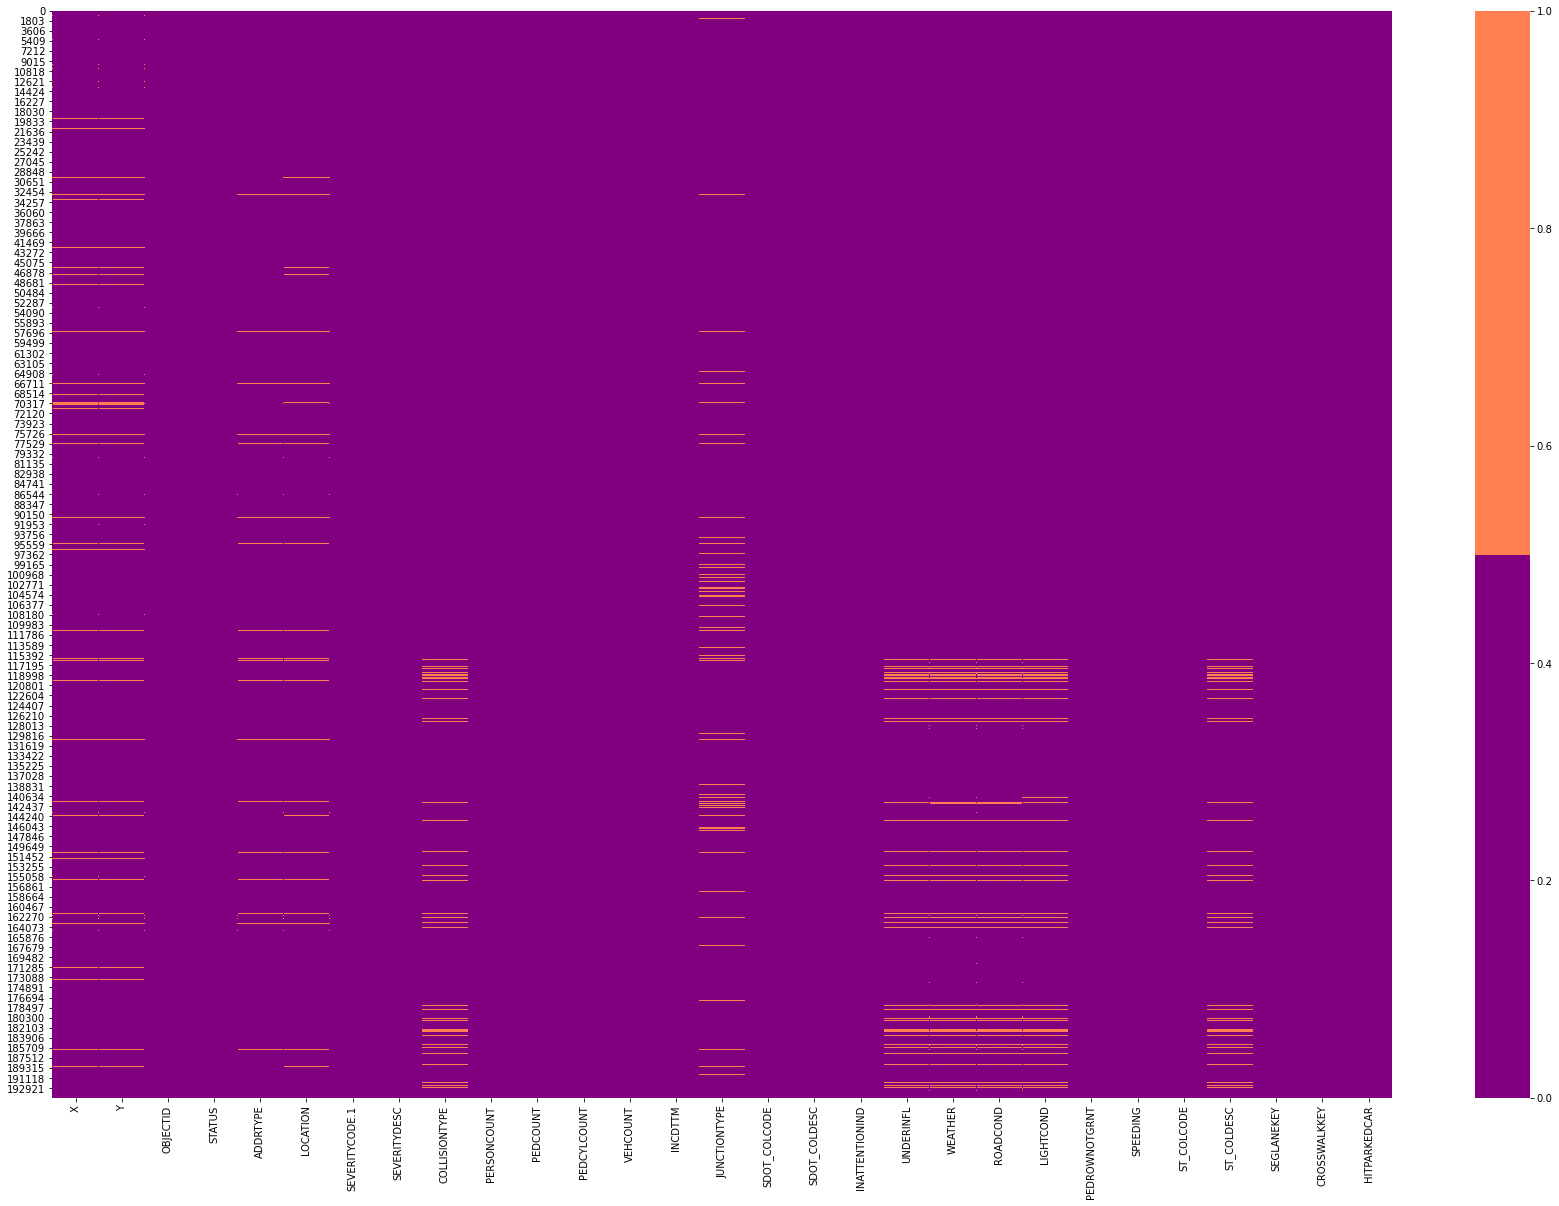

In [25]:
cols = df.columns[:] 

colours = ['purple', 'coral'] # specify the colours - coral is missing. purple is not missing

plt.subplots(figsize=(30,20))
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [26]:
df.isnull().sum()

X                 5334
Y                 5334
OBJECTID             0
STATUS               0
ADDRTYPE          1926
LOCATION          2677
SEVERITYCODE.1       0
SEVERITYDESC         0
COLLISIONTYPE     4904
PERSONCOUNT          0
PEDCOUNT             0
PEDCYLCOUNT          0
VEHCOUNT             0
INCDTTM              0
JUNCTIONTYPE      6329
SDOT_COLCODE         0
SDOT_COLDESC         0
INATTENTIONIND       0
UNDERINFL         4884
WEATHER           5081
ROADCOND          5012
LIGHTCOND         5170
PEDROWNOTGRNT        0
SPEEDING             0
ST_COLCODE          18
ST_COLDESC        4904
SEGLANEKEY           0
CROSSWALKKEY         0
HITPARKEDCAR         0
dtype: int64

In [27]:
df.UNDERINFL.value_counts()

N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64

In [28]:
df["UNDERINFL"] = data["UNDERINFL"]

In [29]:
df["UNDERINFL"] = df["UNDERINFL"].apply(lambda x: "1" if x=="Y" or x=="1" else ("0" if x=="N" or x=="0" else "NaN"))

In [30]:
df.UNDERINFL.value_counts()

0      180668
1        9121
NaN      4884
Name: UNDERINFL, dtype: int64

In [31]:
# I think if driver involved was under the influence of drugs or alcohol policemans controlled that. 
# so, if UNDERINFL's value is NaN, i done it 0 as no influence of drugs or alcohol.

df["UNDERINFL"] = df["UNDERINFL"].apply(lambda x: "0" if x=="NaN" else x)

In [32]:
df.UNDERINFL.value_counts()

0    185552
1      9121
Name: UNDERINFL, dtype: int64

In [33]:
df.WEATHER.value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [34]:
goodCond = ["Clear", "Partly Cloudy"]
badCond = ["Snowing", "Fog/Smog/Smoke", "Sleet/Hail/Freezing Rain", "Blowing Sand/Dirt", "Severe Crosswind"]
unbalancedCond = ["Raining", "Overcast"]
unknown = ["Unknown", "Other"]

In [35]:
df["WEATHER"].replace("Clear", "good", inplace=True)
df["WEATHER"].replace("Raining", "unbalanced", inplace=True)
df["WEATHER"].replace("Overcast", "unbalanced", inplace=True)
df["WEATHER"].replace("Other", "unknown", inplace=True)
df["WEATHER"].replace("Unknown", "unknown", inplace=True)
df["WEATHER"].replace("Snowing", "bad", inplace=True)
df["WEATHER"].replace("Fog/Smog/Smoke", "bad", inplace=True)
df["WEATHER"].replace("Sleet/Hail/Freezing Rain", "bad", inplace=True)
df["WEATHER"].replace("Blowing Sand/Dirt", "bad", inplace=True)
df["WEATHER"].replace("Severe Crosswind", "bad", inplace=True)
df["WEATHER"].replace("Partly Cloudy", "good", inplace=True)

In [36]:
df.WEATHER.value_counts()

good          111140
unbalanced     60859
unknown        15923
bad             1670
Name: WEATHER, dtype: int64

In [37]:
# if we dont know how weather is, I think we can fill it as Unknown.
# same as that we can do that for ROADCOND and LIGHTCOND
df["WEATHER"] = df["WEATHER"].fillna("Unknown")

In [38]:
df.WEATHER.value_counts()

good          111140
unbalanced     60859
unknown        15923
Unknown         5081
bad             1670
Name: WEATHER, dtype: int64

In [39]:
df.ROADCOND.value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [40]:
goodCond = ["Dry"]
badCond = ["Wet", "Ice", "Snow/Slush", "Stading Water", "Sand/Mud/Dirt", "Oil"]
unknown = ["Unknown", "Other"]

In [41]:
df["ROADCOND"].replace("Dry", "good", inplace=True)
df["ROADCOND"].replace("Wet", "bad", inplace=True)
df["ROADCOND"].replace("Ice", "bad", inplace=True)
df["ROADCOND"].replace("Snow/Slush", "bad", inplace=True)
df["ROADCOND"].replace("Other", "Unknown", inplace=True)
df["ROADCOND"].replace("Standing Water", "bad", inplace=True)
df["ROADCOND"].replace("Sand/Mud/Dirt", "bad", inplace=True)
df["ROADCOND"].replace("Oil", "bad", inplace=True)

In [42]:
df.ROADCOND.value_counts()

good       124510
bad         49941
Unknown     15210
Name: ROADCOND, dtype: int64

In [43]:
# same sitution in here as in ROADCOND.

df.LIGHTCOND.value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [44]:
goodCond = ["DayLight", "Dark - Street Lights On"]
badCond = ["Dusk", "Dawn", "Dark - No Street Lights", "Dark - Street Lights Off", "Dark - Unknown Lighting"]
unknown = ["Unknown", "Other"]

In [45]:
df["LIGHTCOND"].replace("Daylight", "good", inplace=True)
df["LIGHTCOND"].replace("Dark - Street Lights On", "good", inplace=True)
df["LIGHTCOND"].replace("Dark - No Street Lights", "bad", inplace=True)
df["LIGHTCOND"].replace("Dusk", "bad", inplace=True)
df["LIGHTCOND"].replace("Dawn", "bad", inplace=True)
df["LIGHTCOND"].replace("Dark - Street Lights Off", "bad", inplace=True)
df["LIGHTCOND"].replace("Dark - Unknown Lighting", "bad", inplace=True)
df["LIGHTCOND"].replace("Other","Unknown", inplace=True)

In [46]:
df.LIGHTCOND.value_counts()

good       164644
Unknown     13708
bad         11151
Name: LIGHTCOND, dtype: int64

In [47]:
df["ROADCOND"] = df["ROADCOND"].fillna("Unknown")
df["LIGHTCOND"] = df["LIGHTCOND"].fillna("Unknown")

In [48]:
df.isnull().sum()

X                 5334
Y                 5334
OBJECTID             0
STATUS               0
ADDRTYPE          1926
LOCATION          2677
SEVERITYCODE.1       0
SEVERITYDESC         0
COLLISIONTYPE     4904
PERSONCOUNT          0
PEDCOUNT             0
PEDCYLCOUNT          0
VEHCOUNT             0
INCDTTM              0
JUNCTIONTYPE      6329
SDOT_COLCODE         0
SDOT_COLDESC         0
INATTENTIONIND       0
UNDERINFL            0
WEATHER              0
ROADCOND             0
LIGHTCOND            0
PEDROWNOTGRNT        0
SPEEDING             0
ST_COLCODE          18
ST_COLDESC        4904
SEGLANEKEY           0
CROSSWALKKEY         0
HITPARKEDCAR         0
dtype: int64

#### I fixed some null values.

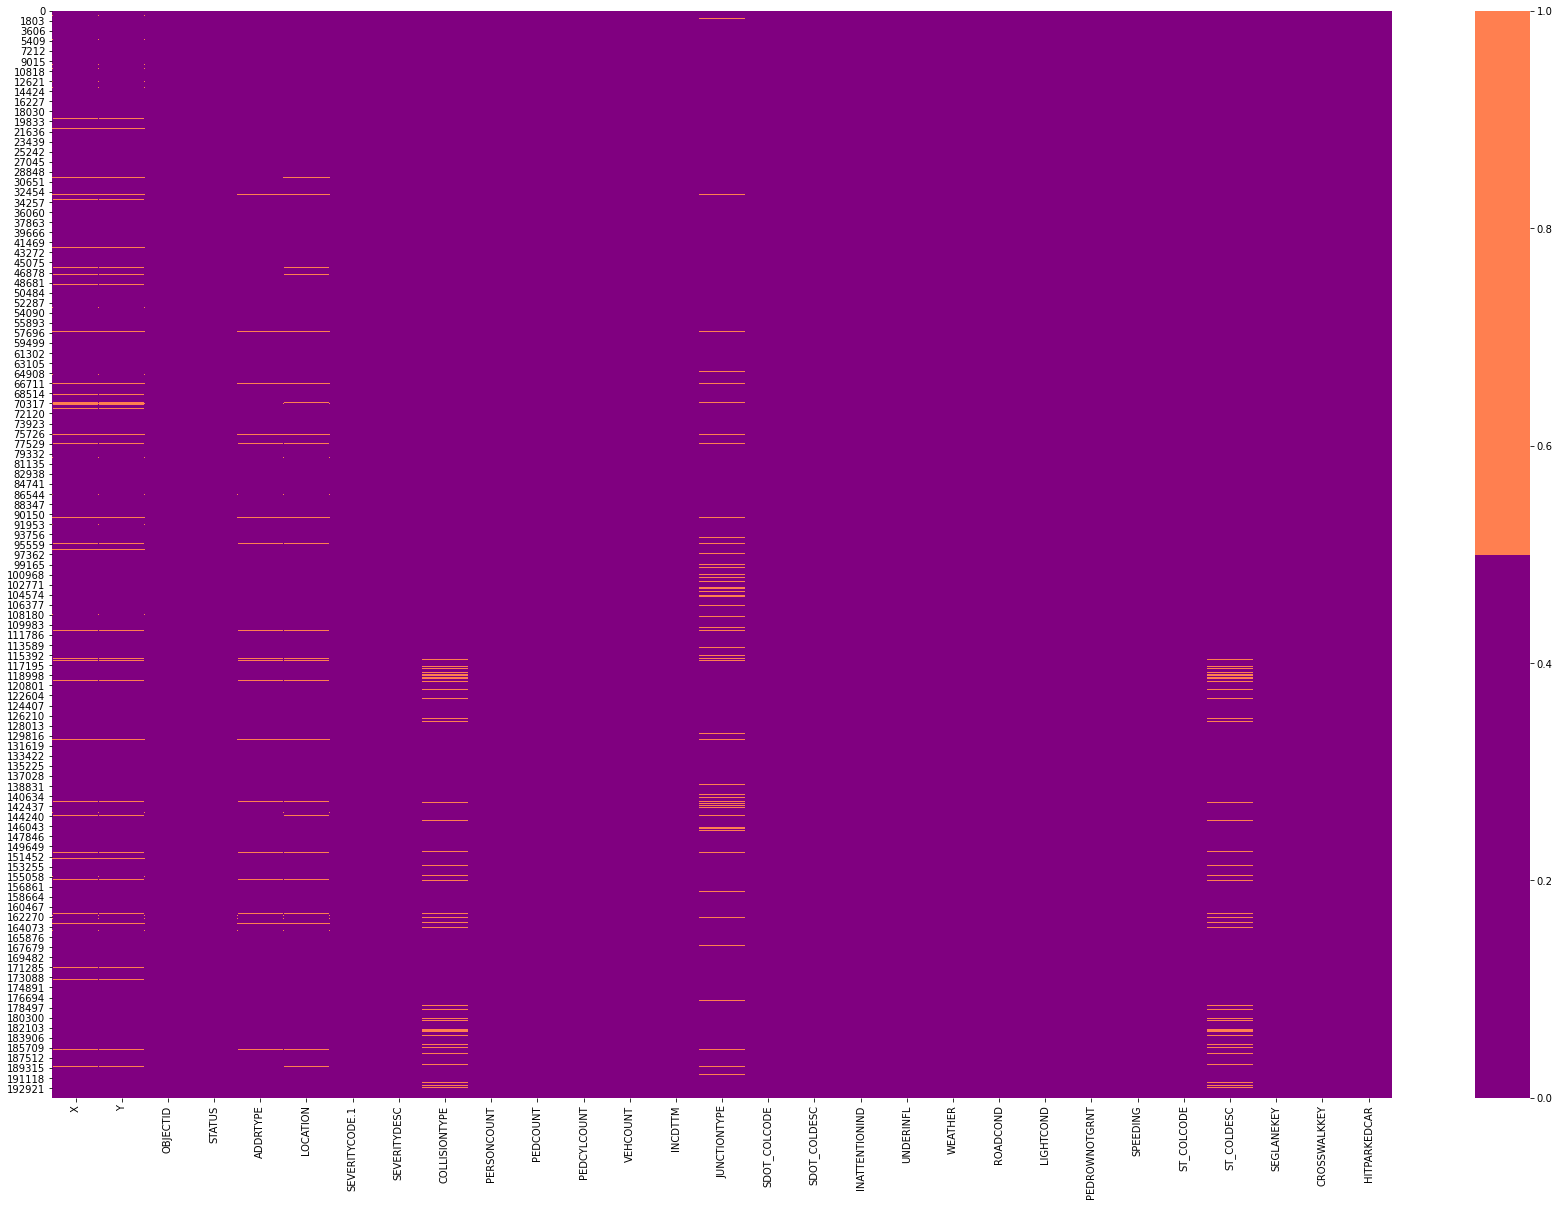

In [49]:
cols = df.columns[:] 

colours = ['purple', 'coral'] # specify the colours - coral is missing. purple is not missing

plt.subplots(figsize=(30,20))
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [50]:
df.COLLISIONTYPE.value_counts()

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

In [51]:
# if we dont know how the collision type, I think i can fill it as other.

df["COLLISIONTYPE"] = df["COLLISIONTYPE"].fillna("Other")

In [52]:
df.COLLISIONTYPE.value_counts()

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         28607
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

In [53]:
df.JUNCTIONTYPE.value_counts()

Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

In [54]:
df["JUNCTIONTYPE"] = df["JUNCTIONTYPE"].fillna("Unknown")

In [55]:
df.ST_COLDESC.value_counts()

One parked--one moving                                                                   44421
Entering at angle                                                                        34674
From same direction - both going straight - one stopped - rear-end                       25771
Fixed object                                                                             13554
From same direction - both going straight - both moving - sideswipe                      12777
From opposite direction - one left turn - one straight                                   10324
From same direction - both going straight - both moving - rear-end                        7629
Vehicle - Pedalcyclist                                                                    4701
From same direction - all others                                                          4537
From same direction - one left turn - one straight                                        3093
From same direction - one right turn - one straigh

In [56]:
# if ST_COLDESC value is nan, i can fill it Not Stated. Because I dont have any information about it .

df["ST_COLDESC"] = df["ST_COLDESC"].fillna("Not stated")

In [57]:
# look at the Not Stated's count. İt increased. i filled it as Not Stated.

df.ST_COLDESC.value_counts()

One parked--one moving                                                                   44421
Entering at angle                                                                        34674
From same direction - both going straight - one stopped - rear-end                       25771
Fixed object                                                                             13554
From same direction - both going straight - both moving - sideswipe                      12777
From opposite direction - one left turn - one straight                                   10324
From same direction - both going straight - both moving - rear-end                        7629
Not stated                                                                                4951
Vehicle - Pedalcyclist                                                                    4701
From same direction - all others                                                          4537
From same direction - one left turn - one straight

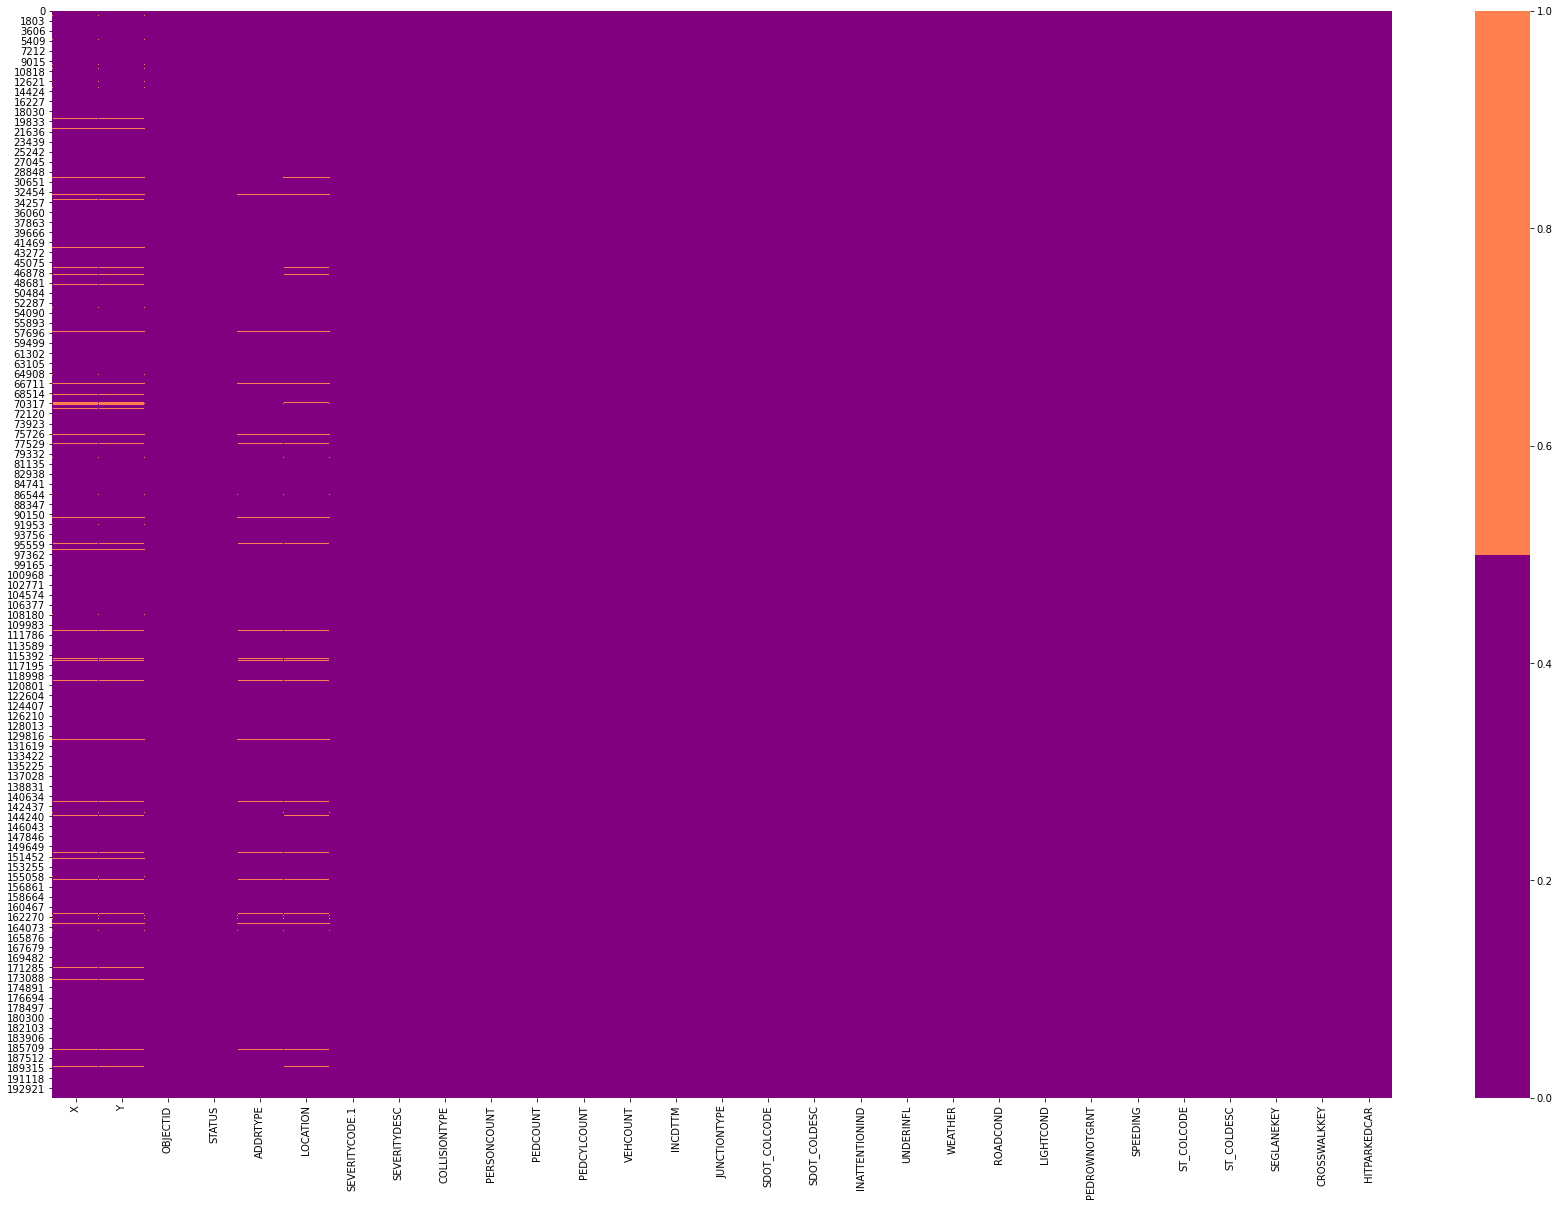

In [58]:
# i handle that is nan values .

cols = df.columns[:] 

colours = ['purple', 'coral'] # specify the colours - coral is missing. purple is not missing

plt.subplots(figsize=(30,20))
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [59]:
df.isnull().sum()

X                 5334
Y                 5334
OBJECTID             0
STATUS               0
ADDRTYPE          1926
LOCATION          2677
SEVERITYCODE.1       0
SEVERITYDESC         0
COLLISIONTYPE        0
PERSONCOUNT          0
PEDCOUNT             0
PEDCYLCOUNT          0
VEHCOUNT             0
INCDTTM              0
JUNCTIONTYPE         0
SDOT_COLCODE         0
SDOT_COLDESC         0
INATTENTIONIND       0
UNDERINFL            0
WEATHER              0
ROADCOND             0
LIGHTCOND            0
PEDROWNOTGRNT        0
SPEEDING             0
ST_COLCODE          18
ST_COLDESC           0
SEGLANEKEY           0
CROSSWALKKEY         0
HITPARKEDCAR         0
dtype: int64

In [60]:
df.ADDRTYPE.value_counts()

Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

In [61]:
df.ADDRTYPE.isnull().sum()

1926

In [62]:
# i looked here that may i fill nan values in ADDRTYPE with COLLISIONTYPE that 
# obviously seen high rate diffrentiate.

pd.crosstab(df["ADDRTYPE"], df["COLLISIONTYPE"], normalize="columns")

COLLISIONTYPE,Angles,Cycles,Head On,Left Turn,Other,Parked Car,Pedestrian,Rear Ended,Right Turn,Sideswipe
ADDRTYPE,,,,,,,,,,
Alley,0.001647,0.001478,0.002478,0.000000,0.010309,0.006937,0.005603,0.000325,0.000000,0.000866
Block,0.163719,0.425799,0.779485,0.155027,0.803220,0.965313,0.281950,0.875731,0.418367,0.788058
Intersection,0.834634,0.572722,0.218038,0.844973,0.186472,0.027750,0.712447,0.123944,0.581633,0.211076


In [63]:
df[df["ADDRTYPE"].isnull()]["COLLISIONTYPE"].value_counts()

Parked Car    1140
Other          281
Rear Ended     244
Sideswipe      137
Angles          66
Left Turn       28
Right Turn      16
Head On          6
Cycles           4
Pedestrian       4
Name: COLLISIONTYPE, dtype: int64

In [64]:
df.head().T

,0,1,2,3,4
X,-122.323,-122.347,-122.335,-122.335,-122.306
Y,47.7031,47.6472,47.6079,47.6048,47.5457
OBJECTID,1,2,3,4,5
STATUS,Matched,Matched,Matched,Matched,Matched
ADDRTYPE,Intersection,Block,Block,Block,Intersection
LOCATION,5TH AVE NE AND NE 103RD ST,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,2ND AVE BETWEEN MARION ST AND MADISON ST,SWIFT AVE S AND SWIFT AV OFF RP
SEVERITYCODE.1,2,1,1,1,2
SEVERITYDESC,Injury Collision,Property Damage Only Collision,Property Damage Only Collision,Property Damage Only Collision,Injury Collision
COLLISIONTYPE,Angles,Sideswipe,Parked Car,Other,Angles
PERSONCOUNT,2,2,4,3,2


In [121]:
df_viz = df.drop(["X", "Y", "OBJECTID", "LOCATION", "SEVERITYDESC", "INCDTTM", "SDOT_COLDESC", "ST_COLDESC", 
                  "PERSONCOUNT", "PEDCOUNT", "PEDCYLCOUNT", "VEHCOUNT", "SDOT_COLCODE", "UNDERINFL", 
                  "PEDROWNOTGRNT", "ST_COLCODE", "SEGLANEKEY", "CROSSWALKKEY", "HITPARKEDCAR", "SPEEDING"], 
                axis=1)
df_viz

,STATUS,ADDRTYPE,SEVERITYCODE.1,COLLISIONTYPE,JUNCTIONTYPE,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND
0,Matched,Intersection,2,Angles,At Intersection (intersection related),0,unbalanced,bad,good
1,Matched,Block,1,Sideswipe,Mid-Block (not related to intersection),0,unbalanced,bad,good
2,Matched,Block,1,Parked Car,Mid-Block (not related to intersection),0,unbalanced,good,good
3,Matched,Block,1,Other,Mid-Block (not related to intersection),0,good,good,good
4,Matched,Intersection,2,Angles,At Intersection (intersection related),0,unbalanced,bad,good
5,Matched,Intersection,1,Angles,At Intersection (intersection related),0,good,good,good
6,Matched,Intersection,1,Angles,At Intersection (intersection related),0,unbalanced,bad,good
7,Matched,Intersection,2,Cycles,At Intersection (intersection related),0,good,good,good
8,Matched,Block,1,Parked Car,Mid-Block (not related to intersection),0,good,good,good
9,Matched,Intersection,2,Angles,At Intersection (intersection related),0,good,good,good


## Data Visualization

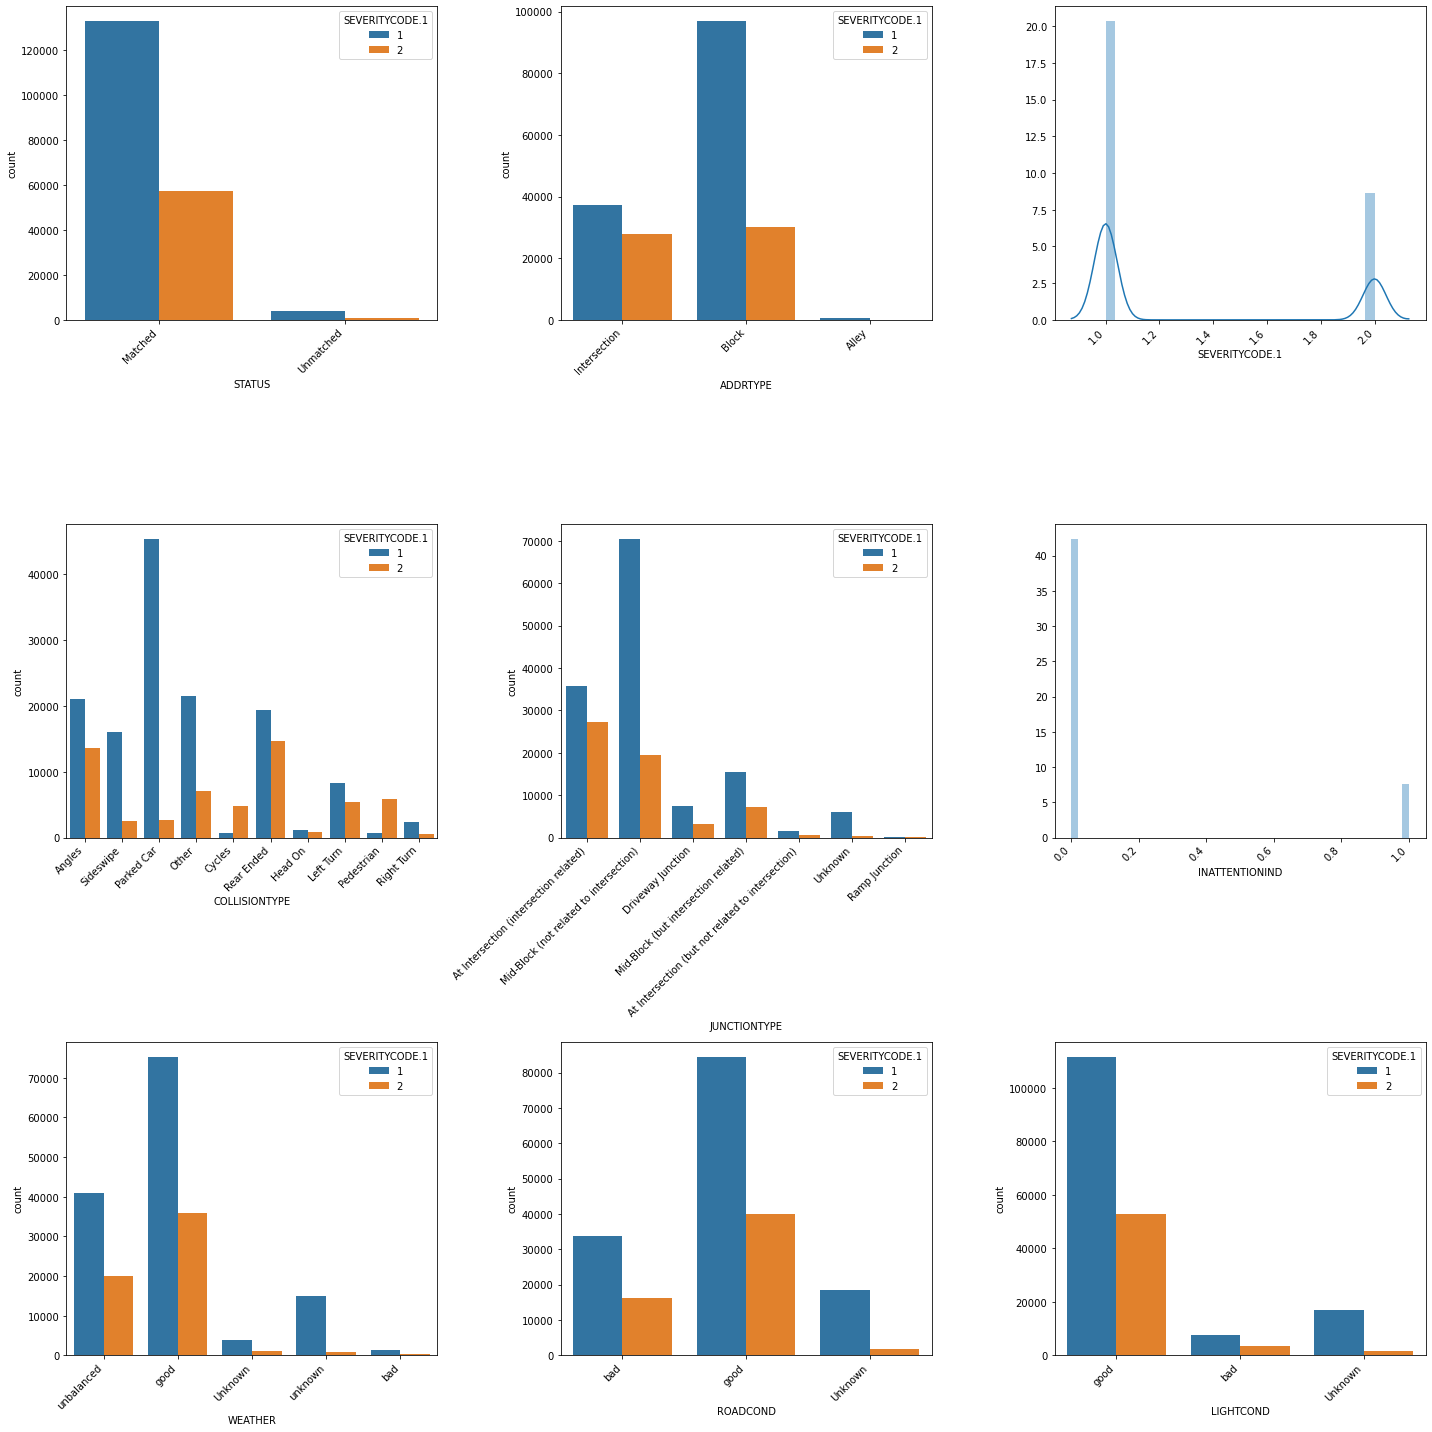

In [118]:
fig, axes =plt.subplots(3,3, figsize=(20,20))
axes = axes.flatten()
for ax, col in zip(axes, df_viz.columns):
    ax.set_xlabel(col)
    if df_viz[col].dtype=='O':
        sns.countplot(x=col, hue ='SEVERITYCODE.1', data=df, ax=ax)
    else:
        sns.distplot(df_viz[col],ax=ax)
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

fig.tight_layout()

In [65]:
X = df.drop(["X", "Y", "OBJECTID", "LOCATION", "SEVERITYDESC", "INCDTTM", "SDOT_COLDESC", "ST_COLDESC"], axis=1)
X

,STATUS,ADDRTYPE,SEVERITYCODE.1,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,...,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,Matched,Intersection,2,Angles,2,0,0,2,At Intersection (intersection related),11,...,0,unbalanced,bad,good,0,0,10,0,0,0
1,Matched,Block,1,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),16,...,0,unbalanced,bad,good,0,0,11,0,0,0
2,Matched,Block,1,Parked Car,4,0,0,3,Mid-Block (not related to intersection),14,...,0,unbalanced,good,good,0,0,32,0,0,0
3,Matched,Block,1,Other,3,0,0,3,Mid-Block (not related to intersection),11,...,0,good,good,good,0,0,23,0,0,0
4,Matched,Intersection,2,Angles,2,0,0,2,At Intersection (intersection related),11,...,0,unbalanced,bad,good,0,0,10,0,0,0
5,Matched,Intersection,1,Angles,2,0,0,2,At Intersection (intersection related),11,...,0,good,good,good,0,0,10,0,0,0
6,Matched,Intersection,1,Angles,2,0,0,2,At Intersection (intersection related),11,...,0,unbalanced,bad,good,0,0,10,0,0,0
7,Matched,Intersection,2,Cycles,3,0,1,1,At Intersection (intersection related),51,...,0,good,good,good,0,0,5,6855,0,0
8,Matched,Block,1,Parked Car,2,0,0,2,Mid-Block (not related to intersection),11,...,0,good,good,good,0,0,32,0,0,0
9,Matched,Intersection,2,Angles,2,0,0,2,At Intersection (intersection related),11,...,0,good,good,good,0,0,10,0,0,0


## Modeling 

In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [67]:
X.columns

Index(['STATUS', 'ADDRTYPE', 'SEVERITYCODE.1', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SPEEDING', 'ST_COLCODE', 'SEGLANEKEY', 'CROSSWALKKEY',
       'HITPARKEDCAR'],
      dtype='object')

In [68]:
dms = pd.get_dummies(X[["STATUS", "ADDRTYPE", "SEVERITYCODE.1", "COLLISIONTYPE", "JUNCTIONTYPE", "SDOT_COLCODE", 
                "WEATHER", "ROADCOND", "LIGHTCOND", "UNDERINFL"]])
X = X.drop(["STATUS", "ADDRTYPE", "SEVERITYCODE.1", "COLLISIONTYPE", "JUNCTIONTYPE", "SDOT_COLCODE", 
                "WEATHER", "ROADCOND", "LIGHTCOND", "UNDERINFL", "ST_COLCODE", "SEGLANEKEY", "CROSSWALKKEY"],
           axis=1)

In [69]:
X = pd.concat([X, dms], axis=1)
y = X["SEVERITYCODE.1"]
X = X.drop("SEVERITYCODE.1", axis=1)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 1.Decision Tree

In [71]:
dt = DecisionTreeClassifier()

In [72]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [73]:
dt_y_pred = dt.predict(X_test)

### 2.KNN

In [74]:
knn = KNeighborsClassifier(n_neighbors = 11).fit(X_train, y_train)

In [75]:
knn_y_pred = knn.predict(X_test)

### 3.Logistic Regression

In [76]:
lr = LogisticRegression(C = 0.01, solver = 'liblinear').fit(X_train, y_train)

In [78]:
lr_y_pred = lr.predict(X_test)

### 4.Random Forests

In [80]:
rf_model = RandomForestClassifier(random_state=42).fit(X_train, y_train)

In [81]:
rf_y_pred = rf_model.predict(X_test)

## Evaluation

In [93]:
from sklearn.metrics import jaccard_score, f1_score, accuracy_score, precision_score, recall_score, log_loss

In [94]:
# KNN
knn_jac = jaccard_score(y_test, knn_y_pred)
knn_f1 = f1_score(y_test, knn_y_pred, average='weighted')
knn_score = accuracy_score(y_test, knn_y_pred)
knn_report = classification_report(y_test, knn_y_pred)
knn_pre = precision_score(y_test, knn_y_pred)
knn_rec = recall_score(y_test, knn_y_pred)

# Decision Tree
dt_jac = jaccard_score(y_test, dt_y_pred)
dt_f1 = f1_score(y_test, dt_y_pred, average='weighted')
dt_score = accuracy_score(y_test, dt_y_pred)
dt_report = classification_report(y_test, dt_y_pred)
dt_pre = precision_score(y_test, dt_y_pred)
dt_rec = recall_score(y_test, dt_y_pred)

# Random Forests
rf_jac = jaccard_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred, average='weighted')
rf_score = accuracy_score(y_test, rf_y_pred)
rf_report = classification_report(y_test, rf_y_pred)
rf_pre = precision_score(y_test, rf_y_pred)
rf_rec = recall_score(y_test, rf_y_pred)

# Logistic Regression
lr_jac = jaccard_score(y_test, lr_y_pred)
lr_f1 = f1_score(y_test, lr_y_pred, average='weighted')
lr_score = accuracy_score(y_test, lr_y_pred)
lr_report = classification_report(y_test, lr_y_pred)
lr_pre = precision_score(y_test, lr_y_pred)
lr_rec = recall_score(y_test, lr_y_pred)

lr_pr = lr.predict_proba(X_test)
lr_prob = round(log_loss(y_test, lr_pr), 2)

In [106]:
knn_list = [knn_jac, knn_f1, knn_score, knn_pre, knn_rec]
dt_list = [dt_jac, dt_f1, dt_score, dt_pre, dt_rec]
rf_list = [rf_jac, rf_f1, rf_score, rf_pre, rf_rec]
lr_list = [lr_jac, lr_f1, lr_score, lr_pre, lr_rec]
columns = ['KNN', 'Decision Tree', 'Random Forests', 'Logistic Regression']
index = ['Jaccard', 'F1-score','Accuracy','Precision','Recall']
result_df = pd.DataFrame(data=zip(knn_list,dt_list,rf_list,lr_list), columns=columns, index=index)
result_df = result_df.transpose()
result_df

,Jaccard,F1-score,Accuracy,Precision,Recall
KNN,0.716248,0.734520,0.750933,0.784300,0.891947
Decision Tree,0.724218,0.722685,0.751413,0.768603,0.926151
Random Forests,0.725019,0.727322,0.753519,0.772396,0.921997
Logistic Regression,0.736739,0.722029,0.759666,0.763742,0.954209


In [99]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[0.92615086 0.07384914]
 [0.66589314 0.33410686]]


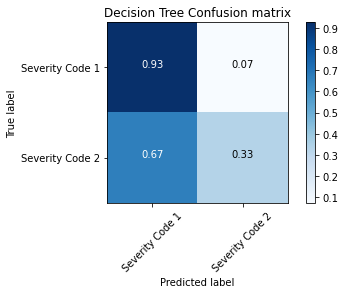

In [100]:
dt_matrix = confusion_matrix(y_test, dt_y_pred)



# Plot confusion matrix
plt.figure()
plot_confusion_matrix(dt_matrix, classes=['Severity Code 1','Severity Code 2'], 
                      normalize= "pred",  title='Decision Tree Confusion matrix')

Normalized confusion matrix
[[0.89194704 0.10805296]
 [0.5858328  0.4141672 ]]


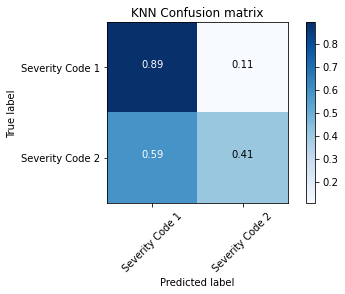

In [102]:
knn_matrix = confusion_matrix(y_test, knn_y_pred)



# Plot confusion matrix
plt.figure()
plot_confusion_matrix(knn_matrix, classes=['Severity Code 1','Severity Code 2'], 
                      normalize= "pred",  title='KNN Confusion matrix')

Normalized confusion matrix
[[0.92199684 0.07800316]
 [0.6488368  0.3511632 ]]


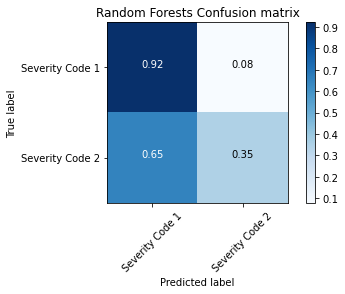

In [103]:
rf_matrix = confusion_matrix(y_test, rf_y_pred)



# Plot confusion matrix
plt.figure()
plot_confusion_matrix(rf_matrix, classes=['Severity Code 1','Severity Code 2'], 
                      normalize= "pred",  title='Random Forests Confusion matrix')

Normalized confusion matrix
[[0.95420867 0.04579133]
 [0.70493705 0.29506295]]


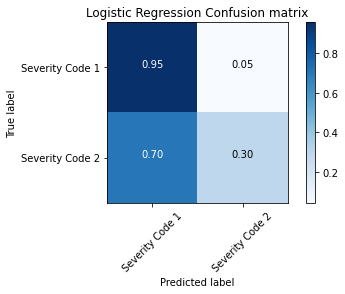

In [104]:
lr_matrix = confusion_matrix(y_test, lr_y_pred)



# Plot confusion matrix
plt.figure()
plot_confusion_matrix(lr_matrix, classes=['Severity Code 1','Severity Code 2'], 
                      normalize= "pred",  title='Logistic Regression Confusion matrix')

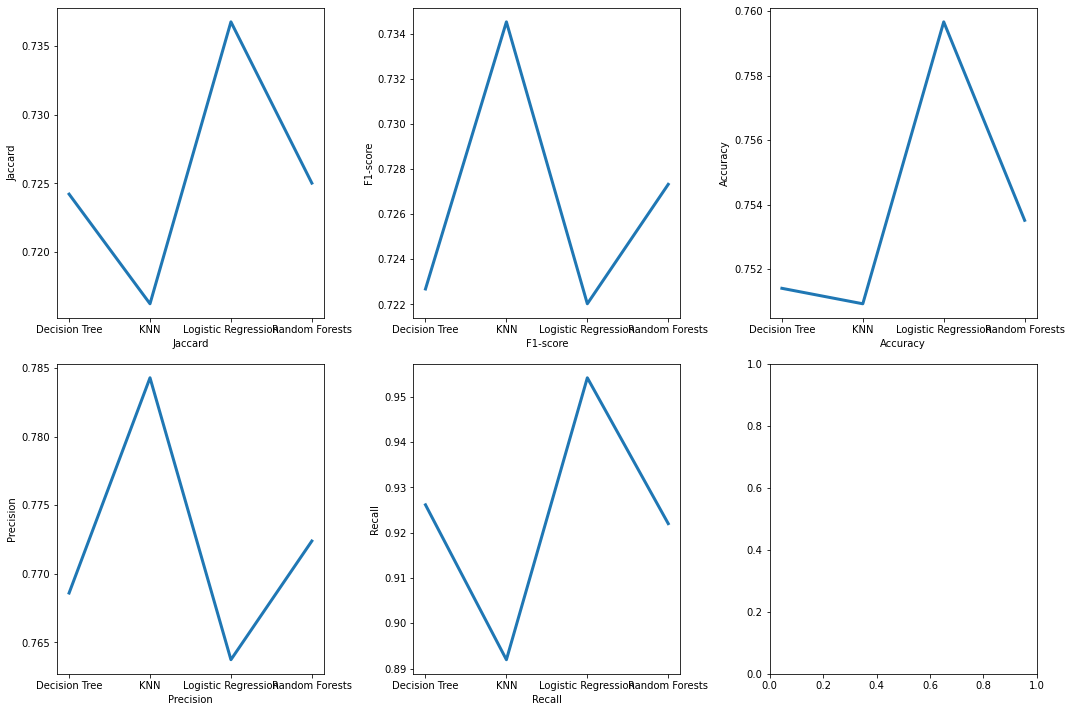

In [107]:
fig, axes =plt.subplots(2,3, figsize=(15,10))
axes = axes.flatten()
for ax, col in zip(axes, result_df.columns):
    ax.set_xlabel(col)
    sns.lineplot(x=result_df.index, y=col, data=result_df, ax=ax, linewidth = 3)
fig.tight_layout()

Here precision means the % of predicted collisions involved injuries were truly involved injuries. 
The recall instead, is the % of collisions truly involved injuries that were properly predicted. For this specific 
problem, the recall is more important than the precision as a high recall will favor that all required resources 
will be equipped up to predict collisions involve injuries.